In [2]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split


In [3]:
mental = pd.read_excel(r"C:\Users\haiss\Downloads\Dataset_maternal_mental_health_infant_sleep.csv\Dataset_maternal_mental_health_infant_sleep.xlsx")
mental

cols = []
for i in range(len(mental.columns)): 
    cols.append(mental.columns[i].lower().replace(' ', '_')) 
mental.columns = cols

mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_autre,marital_status_edit,education,gestationnal_age,...,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,NaN,2,5,37.0,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00:00,3,2
1,2,1,1,1,33,2,NaN,2,5,42.0,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00:00,0,4
2,3,1,1,1,37,2,NaN,2,5,41.0,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00:00,1,2
3,4,1,1,1,31,2,NaN,2,5,37.5,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00:00,2,1
4,5,1,1,1,36,1,NaN,1,5,40.0,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30:00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,NaN,2,3,39.5,...,6.0,6.0,NaN,NaN,4.0,2.0,NaN,09:00:00,1,2
406,407,1,1,1,26,2,NaN,2,2,37.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,12:00:00,0,4
407,408,1,1,1,26,2,NaN,2,5,39.0,...,1.0,2.0,1.0,3.0,2.0,3.0,2.0,10:00:00,2,5
408,409,1,1,1,27,2,NaN,2,5,41.2,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,11:30:00,0,4


In [4]:
pd.set_option('display.max_columns', None)
mental.head()

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_autre,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,NaN,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,NaN,7.0,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00:00,3,2
1,2,1,1,1,33,2,NaN,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00:00,0,4
2,3,1,1,1,37,2,NaN,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,NaN,NaN,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00:00,1,2
3,4,1,1,1,31,2,NaN,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00:00,2,1
4,5,1,1,1,36,1,NaN,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30:00,1,4


In [5]:
mental.dtypes

participant_number              int64
type_parents                    int64
birth_1mth_m_inclusion          int64
birth_12mth_m_inclusion         int64
age                             int64
                               ...   
ibq_r_vsf_32_bb1              float64
ibq_r_vsf_33_bb1              float64
sleep_night_duration_bb1       object
night_awakening_number_bb1      int64
how_falling_asleep_bb1          int64
Length: 64, dtype: object

In [6]:
mental['marital_status_autre']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
405    NaN
406    NaN
407    NaN
408    NaN
409    NaN
Name: marital_status_autre, Length: 410, dtype: object

In [7]:
mental = mental.drop(['marital_status_autre'], axis = 1) 
mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,NaN,7.0,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00:00,3,2
1,2,1,1,1,33,2,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00:00,0,4
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,NaN,NaN,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00:00,1,2
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00:00,2,1
4,5,1,1,1,36,1,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30:00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,NaN,NaN,4.0,2.0,NaN,09:00:00,1,2
406,407,1,1,1,26,2,2,2,37.0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,0,1,2,0,2,2,1,1,0,2,3,3,0,2,3,1,1,2,7.0,2.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,12:00:00,0,4
407,408,1,1,1,26,2,2,5,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,1,0,1,0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,10:00:00,2,5
408,409,1,1,1,27,2,2,5,41.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,11:30:00,0,4


In [8]:
numeric_mental = mental.select_dtypes(include=[np.number])
numeric_mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,NaN,7.0,NaN,7.0,NaN,NaN,7.0,6.0,NaN,3,2
1,2,1,1,1,33,2,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,0,4
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,NaN,NaN,4.0,4.0,3.0,1.0,4.0,NaN,NaN,1,2
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,2,1
4,5,1,1,1,36,1,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,NaN,NaN,4.0,2.0,NaN,1,2
406,407,1,1,1,26,2,2,2,37.0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,0,1,2,0,2,2,1,1,0,2,3,3,0,2,3,1,1,2,7.0,2.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0,4
407,408,1,1,1,26,2,2,5,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,1,0,1,0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,2,5
408,409,1,1,1,27,2,2,5,41.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0,4


In [9]:
numeric_mental.isna().sum()

participant_number             0
type_parents                   0
birth_1mth_m_inclusion         0
birth_12mth_m_inclusion        0
age                            0
                              ..
ibq_r_vsf_29_bb1              15
ibq_r_vsf_32_bb1              32
ibq_r_vsf_33_bb1              84
night_awakening_number_bb1     0
how_falling_asleep_bb1         0
Length: 62, dtype: int64

In [10]:
null_data = numeric_mental.isna().any(axis = 1)
numeric_mental[null_data]

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,NaN,7.0,NaN,7.0,NaN,NaN,7.0,6.0,NaN,3,2
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,NaN,NaN,4.0,4.0,3.0,1.0,4.0,NaN,NaN,1,2
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,2,1
5,6,1,1,1,32,2,2,5,41.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,0,4
6,7,1,1,1,28,2,2,4,41.0,1,2,1,2,1,1,3,3,0,2,3,3,3,1,0,2,3,3,3,0,1,2,1,2,3,3,3,3,3,2,2,3,3,0,3,3,3,1,3,1,3,7.0,7.0,7.0,5.0,6.0,NaN,7.0,3.0,6.0,7.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,401,1,1,1,25,2,2,2,40.5,1,2,2,0,2,2,2,0,0,0,3,3,3,2,3,1,2,1,3,2,3,2,2,1,3,3,2,3,2,2,2,2,2,3,3,2,2,0,3,1,1,2.0,3.0,2.0,6.0,3.0,2.0,NaN,5.0,NaN,NaN,1,2
401,402,1,1,1,27,2,2,5,40.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,2,2,1,1,0,1,1,2,0,0,0,0,2,1,3,2,1,0,1,1,3,1.0,1.0,2.0,1.0,2.0,NaN,1.0,NaN,7.0,1.0,0,4
403,404,1,1,1,25,2,2,3,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,2,1,0,1,0,1,1,5.0,NaN,4.0,1.0,5.0,1.0,NaN,6.0,NaN,NaN,2,1
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,NaN,NaN,4.0,2.0,NaN,1,2


In [11]:
numeric_mental['ibq_r_vsf_33_bb1'] = numeric_mental['ibq_r_vsf_33_bb1'].fillna('0.0')
numeric_mental.isna().sum()

participant_number             0
type_parents                   0
birth_1mth_m_inclusion         0
birth_12mth_m_inclusion        0
age                            0
                              ..
ibq_r_vsf_29_bb1              15
ibq_r_vsf_32_bb1              32
ibq_r_vsf_33_bb1               0
night_awakening_number_bb1     0
how_falling_asleep_bb1         0
Length: 62, dtype: int64

In [12]:
numeric_mental.fillna(value=0, inplace=True)
numeric_mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,0.0,7.0,0.0,7.0,0.0,0.0,7.0,6.0,0.0,3,2
1,2,1,1,1,33,2,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,0,4
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,0.0,0.0,4.0,4.0,3.0,1.0,4.0,0.0,0.0,1,2
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,0.0,0.0,0.0,5.0,0.0,2,1
4,5,1,1,1,36,1,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,0.0,0.0,4.0,2.0,0.0,1,2
406,407,1,1,1,26,2,2,2,37.0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,0,1,2,0,2,2,1,1,0,2,3,3,0,2,3,1,1,2,7.0,2.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0,4
407,408,1,1,1,26,2,2,5,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,1,0,1,0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,2,5
408,409,1,1,1,27,2,2,5,41.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0,4


In [13]:
## ANOVA is used to compare the means of three or more groups. There are different types of ANOVA:

## One-way ANOVA: Compares means across one independent variable with multiple levels (e.g., different groups).

In [14]:
## Item of the Brief Infant Sleep Questionnaire assessing nocturnal sleep duration (between 7pm and 7 am)
## Number 1 for girl and 2 for boys
## Girls awake many times than boys

<Axes: xlabel='night_awakening_number_bb1,sex_baby1'>

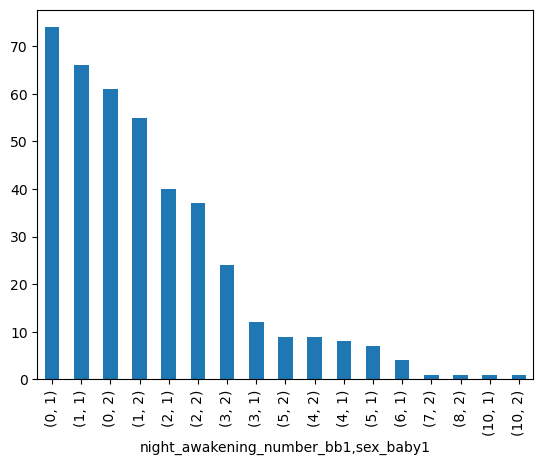

In [15]:
numeric_mental[['night_awakening_number_bb1','sex_baby1']].value_counts().plot(kind='bar')

In [16]:
numeric_mental['had']=numeric_mental['hads_1'] + numeric_mental['hads_3'] + numeric_mental['hads_5'] + numeric_mental['hads_7'] +numeric_mental['hads_9'] +numeric_mental['hads_11'] +numeric_mental['hads_13'] 
numeric_mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,had
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,0.0,7.0,0.0,7.0,0.0,0.0,7.0,6.0,0.0,3,2,9
1,2,1,1,1,33,2,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,0,4,3
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,0.0,0.0,4.0,4.0,3.0,1.0,4.0,0.0,0.0,1,2,9
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,0.0,0.0,0.0,5.0,0.0,2,1,13
4,5,1,1,1,36,1,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,0.0,0.0,4.0,2.0,0.0,1,2,4
406,407,1,1,1,26,2,2,2,37.0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,0,1,2,0,2,2,1,1,0,2,3,3,0,2,3,1,1,2,7.0,2.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0,4,14
407,408,1,1,1,26,2,2,5,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,1,0,1,0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,2,5,3
408,409,1,1,1,27,2,2,5,41.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0,4,4


In [17]:
numeric_mental['cbts']=numeric_mental['cbts_m_3'] + numeric_mental['cbts_m_4'] + numeric_mental['cbts_m_5'] + numeric_mental['cbts_m_6'] +numeric_mental['cbts_m_7'] +numeric_mental['cbts_m_8'] +numeric_mental['cbts_m_9']  +numeric_mental['cbts_m_10'] +numeric_mental['cbts_m_11'] +numeric_mental['cbts_m_12'] +numeric_mental['cbts_13'] +numeric_mental['cbts_14'] +numeric_mental['cbts_15'] +numeric_mental['cbts_16'] +numeric_mental['cbts_17'] +numeric_mental['cbts_18'] +numeric_mental['cbts_19'] +numeric_mental['cbts_20'] +numeric_mental['cbts_21'] +numeric_mental['cbts_22']
numeric_mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,had,cbts
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,0.0,7.0,0.0,7.0,0.0,0.0,7.0,6.0,0.0,3,2,9,6
1,2,1,1,1,33,2,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,0,4,3,0
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,0.0,0.0,4.0,4.0,3.0,1.0,4.0,0.0,0.0,1,2,9,9
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,0.0,0.0,0.0,5.0,0.0,2,1,13,14
4,5,1,1,1,36,1,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,1,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,0.0,0.0,4.0,2.0,0.0,1,2,4,3
406,407,1,1,1,26,2,2,2,37.0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,0,1,2,0,2,2,1,1,0,2,3,3,0,2,3,1,1,2,7.0,2.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0,4,14,8
407,408,1,1,1,26,2,2,5,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,1,0,1,0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,2,5,3,0
408,409,1,1,1,27,2,2,5,41.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0,4,4,0


In [18]:
numeric_mental['epds']=numeric_mental['epds_1'] + numeric_mental['epds_2'] + numeric_mental['epds_3'] + numeric_mental['epds_4'] +numeric_mental['epds_5'] +numeric_mental['epds_6'] +numeric_mental['epds_7']+numeric_mental['epds_8'] +numeric_mental['epds_9'] +numeric_mental['epds_10'] 
numeric_mental

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,had,cbts,epds
0,1,1,1,1,34,2,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,0.0,7.0,0.0,7.0,0.0,0.0,7.0,6.0,0.0,3,2,9,6,13
1,2,1,1,1,33,2,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,0,4,3,0,0
2,3,1,1,1,37,2,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,0.0,0.0,4.0,4.0,3.0,1.0,4.0,0.0,0.0,1,2,9,9,8
3,4,1,1,1,31,2,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,0.0,0.0,0.0,5.0,0.0,2,1,13,14,16
4,5,1,1,1,36,1,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,1,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,2,0,1,2,1.0,3.0,6.0,6.0,6.0,0.0,0.0,4.0,2.0,0.0,1,2,4,3,4
406,407,1,1,1,26,2,2,2,37.0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,0,1,2,0,2,2,1,1,0,2,3,3,0,2,3,1,1,2,7.0,2.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0,4,14,8,9
407,408,1,1,1,26,2,2,5,39.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,1,0,1,0,1,1,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,2,5,3,0,3
408,409,1,1,1,27,2,2,5,41.2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0,4,4,0,0


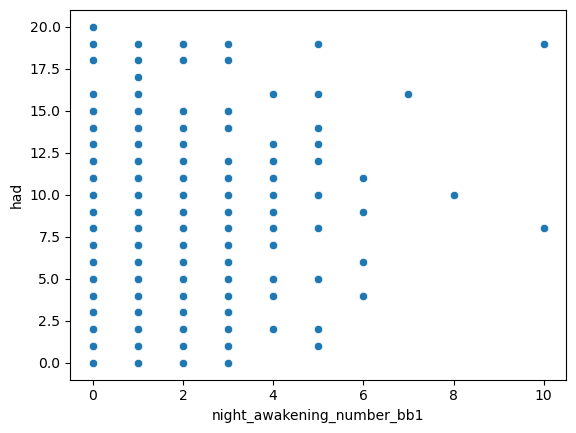

In [19]:
# night_awakening_number_bb1 : Brief Infant Sleep Questionnaire assessing the number of night waking 
# HAD : Hospital Anxiety and Depression Scale (anxiety subscale)

sns.scatterplot(x = numeric_mental['night_awakening_number_bb1'], y = numeric_mental['had'])
plt.show()

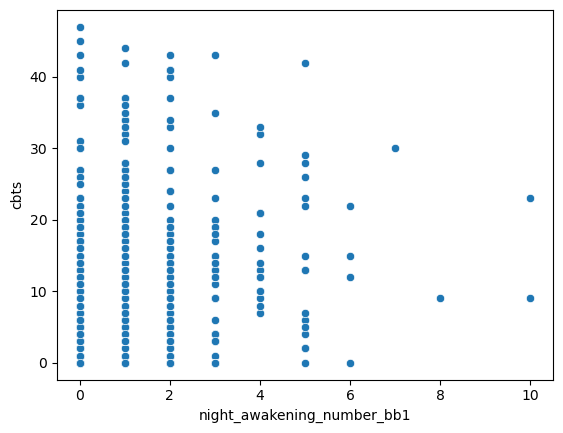

In [20]:
# night_awakening_number_bb1 : Brief Infant Sleep Questionnaire assessing the number of night waking 
# CBTS : Item of the maternal City Birth Trauma Scale 

sns.scatterplot(x = numeric_mental['night_awakening_number_bb1'], y = numeric_mental['cbts'])
plt.show()

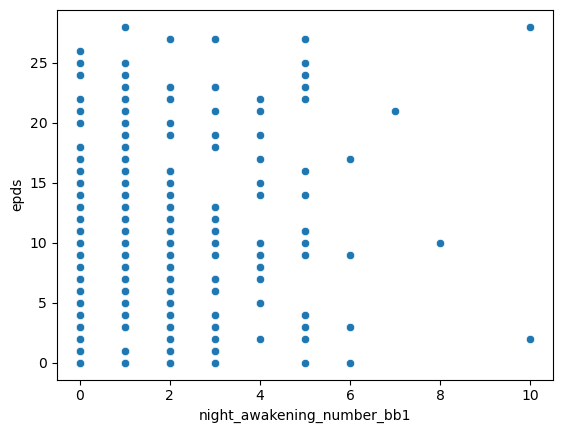

In [21]:
# night_awakening_number_bb1 : Brief Infant Sleep Questionnaire assessing the number of night waking 
# EPDS : Item of the Edinburgh Postnatal Depression Scale

sns.scatterplot(x = numeric_mental['night_awakening_number_bb1'], y = numeric_mental['epds'])
plt.show()

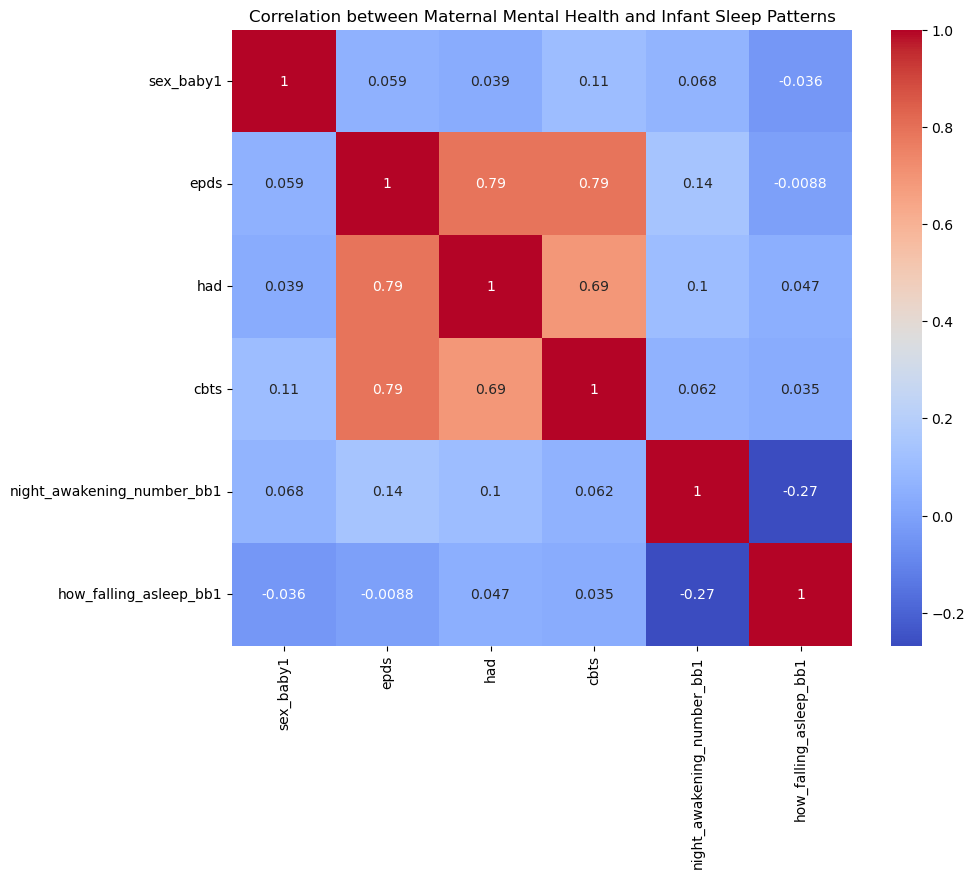

In [22]:
mental_health = ['sex_baby1','epds', 'had', 'cbts']
infant_sleep = ['night_awakening_number_bb1', 'how_falling_asleep_bb1']

# Calculate correlation matrix
correlation_matrix = numeric_mental[mental_health + infant_sleep].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Maternal Mental Health and Infant Sleep Patterns')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns



In [24]:
## Clustering of Infant Sleep Patterns Based on Maternal Mental Health
 ## Identify distinct clusters of infant sleep patterns that correspond to different profiles of maternal mental health.

In [25]:
# Standardize the data
scaler = StandardScaler()
mental_scaled = scaler.fit_transform(numeric_mental[mental_health + infant_sleep])

In [26]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_mental['cluster'] = kmeans.fit_predict(mental_scaled)


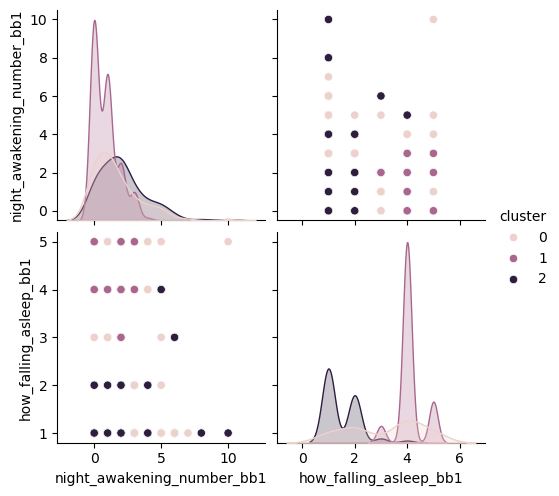

In [27]:

# Visualize clusters
sns.pairplot(numeric_mental, hue='cluster', vars=infant_sleep)
plt.show()

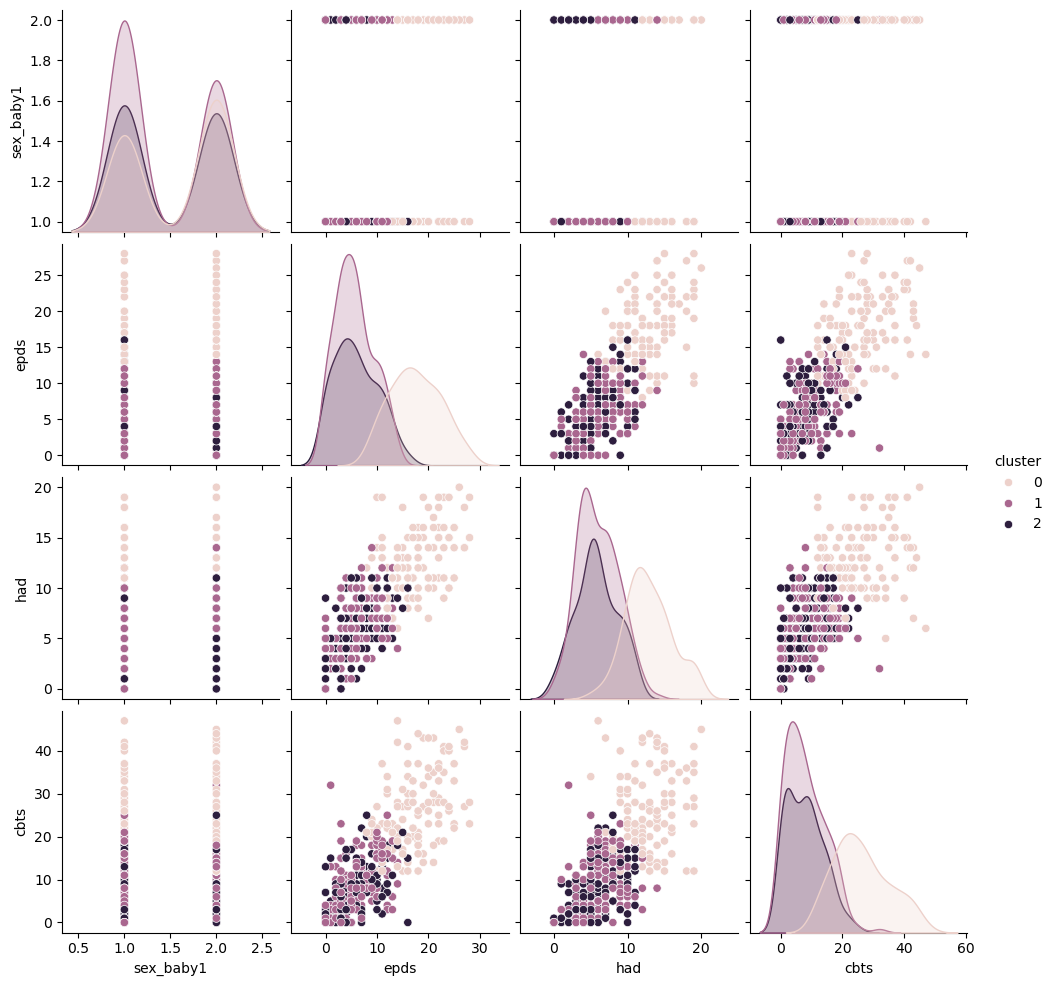

In [28]:
sns.pairplot(numeric_mental, hue='cluster', vars=mental_health)
plt.show()

In [29]:
## Predictive Modeling of Infant Sleep Quality

## Predict the quality of infant sleep based on maternal mental health indicators.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
X = numeric_mental[mental_health]
y = numeric_mental['how_falling_asleep_bb1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.2622540650406504
R-squared: -0.1848560182472978


In [32]:
X = numeric_mental[mental_health]
y = numeric_mental['night_awakening_number_bb1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.3137389663182348
R-squared: -0.4145682981617842
